In [3]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import IPython.display as display
%matplotlib inline

In [4]:
class TenArmedBandit(object):
    def __init__(self):
        self.action_space = 10
        self.q_true = np.random.randn(self.action_space)
        self.t = 0

    def step(self, action):
        noise = np.random.randn(1)[0]
        self.t += 1
        return self.q_true[action] + noise


class Agent(object):
    def __init__(self, action_space, eps=None):
        self.Q = np.zeros(action_space)
        self.K = np.zeros(action_space)
        self.eps = eps
        self.t = 0

    def act(self):
        if self.eps != None and self.eps > random.random():
            return np.random.randint(0, 10)
        a = np.argmax(self.Q)
        return a

    def observe(self, action, reward):
        self.K[action] += 1
        Ka = self.K[action]
        Qa = self.Q[action]
        self.Q[action] = (Qa * (Ka - 1) + reward) / Ka
        self.t += 1


def learn(steps, bandits, eps=None):
    rewards = np.zeros(steps)
    for i in range(bandits):
        game = TenArmedBandit()
        agent = Agent(10, eps=eps)
        for i in range(steps):
            action = agent.act()
            reward = game.step(action)
            rewards[i] += reward
            agent.observe(action, reward)
    return rewards / bandits



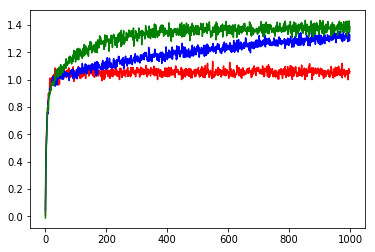

In [5]:
steps = np.arange(0, 1000)
eps0 = learn(1000, 2000, eps=None)
eps001 = learn(1000, 2000, eps=0.01)
eps01 = learn(1000, 2000, eps=0.1)

plt.plot(steps, eps0, 'r', steps, eps001, 'b', steps, eps01, 'g')
plt.show()